In [11]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

In [12]:
!pip show xgboost

Name: xgboost
Version: 2.1.1
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: C:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages
Requires: numpy, scipy
Required-by: 


### 2번 (건강 관련 변수)

- Diphtheria: 디프테리아 예방접종률
- Incidents_HIV: HIV 발생 건수
- Hepatitis_B: B형 간염 예방접종률
- Measles: 홍역 사례 수

### EDA 절차

1. 데이터 로드
- 다양한 소스에서 데이터를 로드한다. (파일, 데이터베이스, API 등에서 데이터를 불러온다.)
- 데이터가 로드된 후에는 구조를 확인하기 위해 첫 몇 줄의 데이터를 출력해 본다.
2. 데이터 구조 및 기초 통계 확인
- 데이터의 구조를 파악하기 위해 컬럼 정보와 데이터 타입을 확인한다.
- 데이터의 기본 통계 정보를 출력하여 각 변수의 분포와 특성을 살펴본다.
- df.head(), df.info(), df.describe() 등의 함수를 사용한다.
3. 결측치 및 이상치 탐색
- 결측치(NaN) 값이 존재하는지 확인하고, 이를 처리하는 방법을 결정한다.
- 데이터에 존재하는 이상치(Outlier)를 탐지하고, 이를 어떻게 처리할지 결정한다.
- df.isnull().sum(), df.boxplot() 등의 함수를 활용한다.
4. 데이터 시각화를 통한 탐색
- 데이터를 시각화하여 변수 간의 관계, 분포 등을 파악한다.
- 히스토그램, 박스플롯, 상관관계 행렬 등 다양한 그래프를 통해 데이터의 특성을 시각적으로 확인한다.
- sns.countplot(), sns.heatmap() 등의 함수를 사용한다.
5. 데이터 정제 및 전처리
- 필요 없는 변수나 중복 데이터를 제거한다.
- 범주형 데이터를 처리하거나, 스케일링 및 정규화를 통해 모델에 적합한 형태로 데이터를 변환한다.
- df.drop(), df.fillna(), pd.get_dummies() 등의 함수를 활용한다.
6. 데이터 변환 및 피처 엔지니어링
- 새로운 피처를 생성하거나 기존 피처를 변환하여 분석에 적합한 형태로 데이터를 조정한다.
- 로그 변환, 다항식 피처 추가 등 다양한 기법을 통해 데이터를 변환할 수 있다.
- np.log(), PolynomialFeatures() 등의 함수를 활용한다.
7. 데이터 분할
- 학습용과 테스트용 데이터로 분할한다.
- 이 과정은 모델을 평가하고 성능을 검증하는 데 중요한 단계이다.
- train_test_split() 함수를 사용한다.

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# 1. 데이터 로드

df = pd.read_csv('./data/Life-Expectancy-Data-Averaged.csv')

print(df.head()) # year 데이터 변화 없음 


               Country                         Region    Year  Infant_deaths  \
0          Afghanistan                           Asia  2007.5       71.08125   
1              Albania                 Rest of Europe  2007.5       15.25625   
2              Algeria                         Africa  2007.5       26.75625   
3               Angola                         Africa  2007.5       88.76875   
4  Antigua and Barbuda  Central America and Caribbean  2007.5        9.47500   

   Under_five_deaths  Adult_mortality  Alcohol_consumption  Hepatitis_B  \
0           98.61250       265.804969             0.016125      64.5625   
1           17.14375        83.132969             4.696875      98.0000   
2           31.19375       113.439281             0.400625      88.3125   
3          144.16250       297.844063             4.935625      68.8125   
4           11.51875       142.478813             7.755000      98.2500   

   Measles       BMI    Polio  Diphtheria  Incidents_HIV  GDP_per_ca

In [15]:
# 결측치 및 이상치 탐색
print(df.info()) # 결측치 없음 대부분 float 타입 
print(df.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      179 non-null    object 
 1   Region                       179 non-null    object 
 2   Year                         179 non-null    float64
 3   Infant_deaths                179 non-null    float64
 4   Under_five_deaths            179 non-null    float64
 5   Adult_mortality              179 non-null    float64
 6   Alcohol_consumption          179 non-null    float64
 7   Hepatitis_B                  179 non-null    float64
 8   Measles                      179 non-null    float64
 9   BMI                          179 non-null    float64
 10  Polio                        179 non-null    float64
 11  Diphtheria                   179 non-null    float64
 12  Incidents_HIV                179 non-null    float64
 13  GDP_per_capita      

##### 2-1 데이터 컬럼 정리


**1. 부동소수점형 컬럼 (float64)**
- `Year`: 연도
- `Infant_deaths`: 영아 사망 수
- `Under_five_deaths`: 5세 이하 사망 수
- `Adult_mortality`: 성인 사망률
- `Alcohol_consumption`: 1인당 알코올 소비량
- `Hepatitis_B`: B형 간염 예방접종률
- `Measles`: 홍역 사례 수
- `BMI`: 평균 BMI(체질량지수)
- `Polio`: 소아마비 예방접종률
- `Diphtheria`: 디프테리아 예방접종률
- `Incidents_HIV`: HIV 발생 건수
- `GDP_per_capita`: 1인당 GDP
- `Population_mln`: 인구(백만 명 단위)
- `Thinness_ten_nineteen_years`: 10-19세의 저체중 비율
- `Thinness_five_nine_years`: 5-9세의 저체중 비율
- `Schooling`: 평균 교육 연수
- `Life_expectancy`: 기대수명

**2. 객체형 컬럼 (object)**
- `Country`: 국가명
- `Region`: 지역명

### 3. 전처리

##### 3-1 결측값 확인

In [16]:
print(df.isnull().sum())

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status                 0
Life_expectancy                0
dtype: int64


* 결측값이 없는 완벽한 데이터

##### 3-2 이상치 확인

* 숫자형은 boxplot을 통해 사분위수를 기준으로 이상값을 확인
* 범주형은 value_counts를 통해 카테고리의 빈도를 확인하여 특정 카테고리의 빈도가 비정상적으로 높거나 낮지 않은지 확인

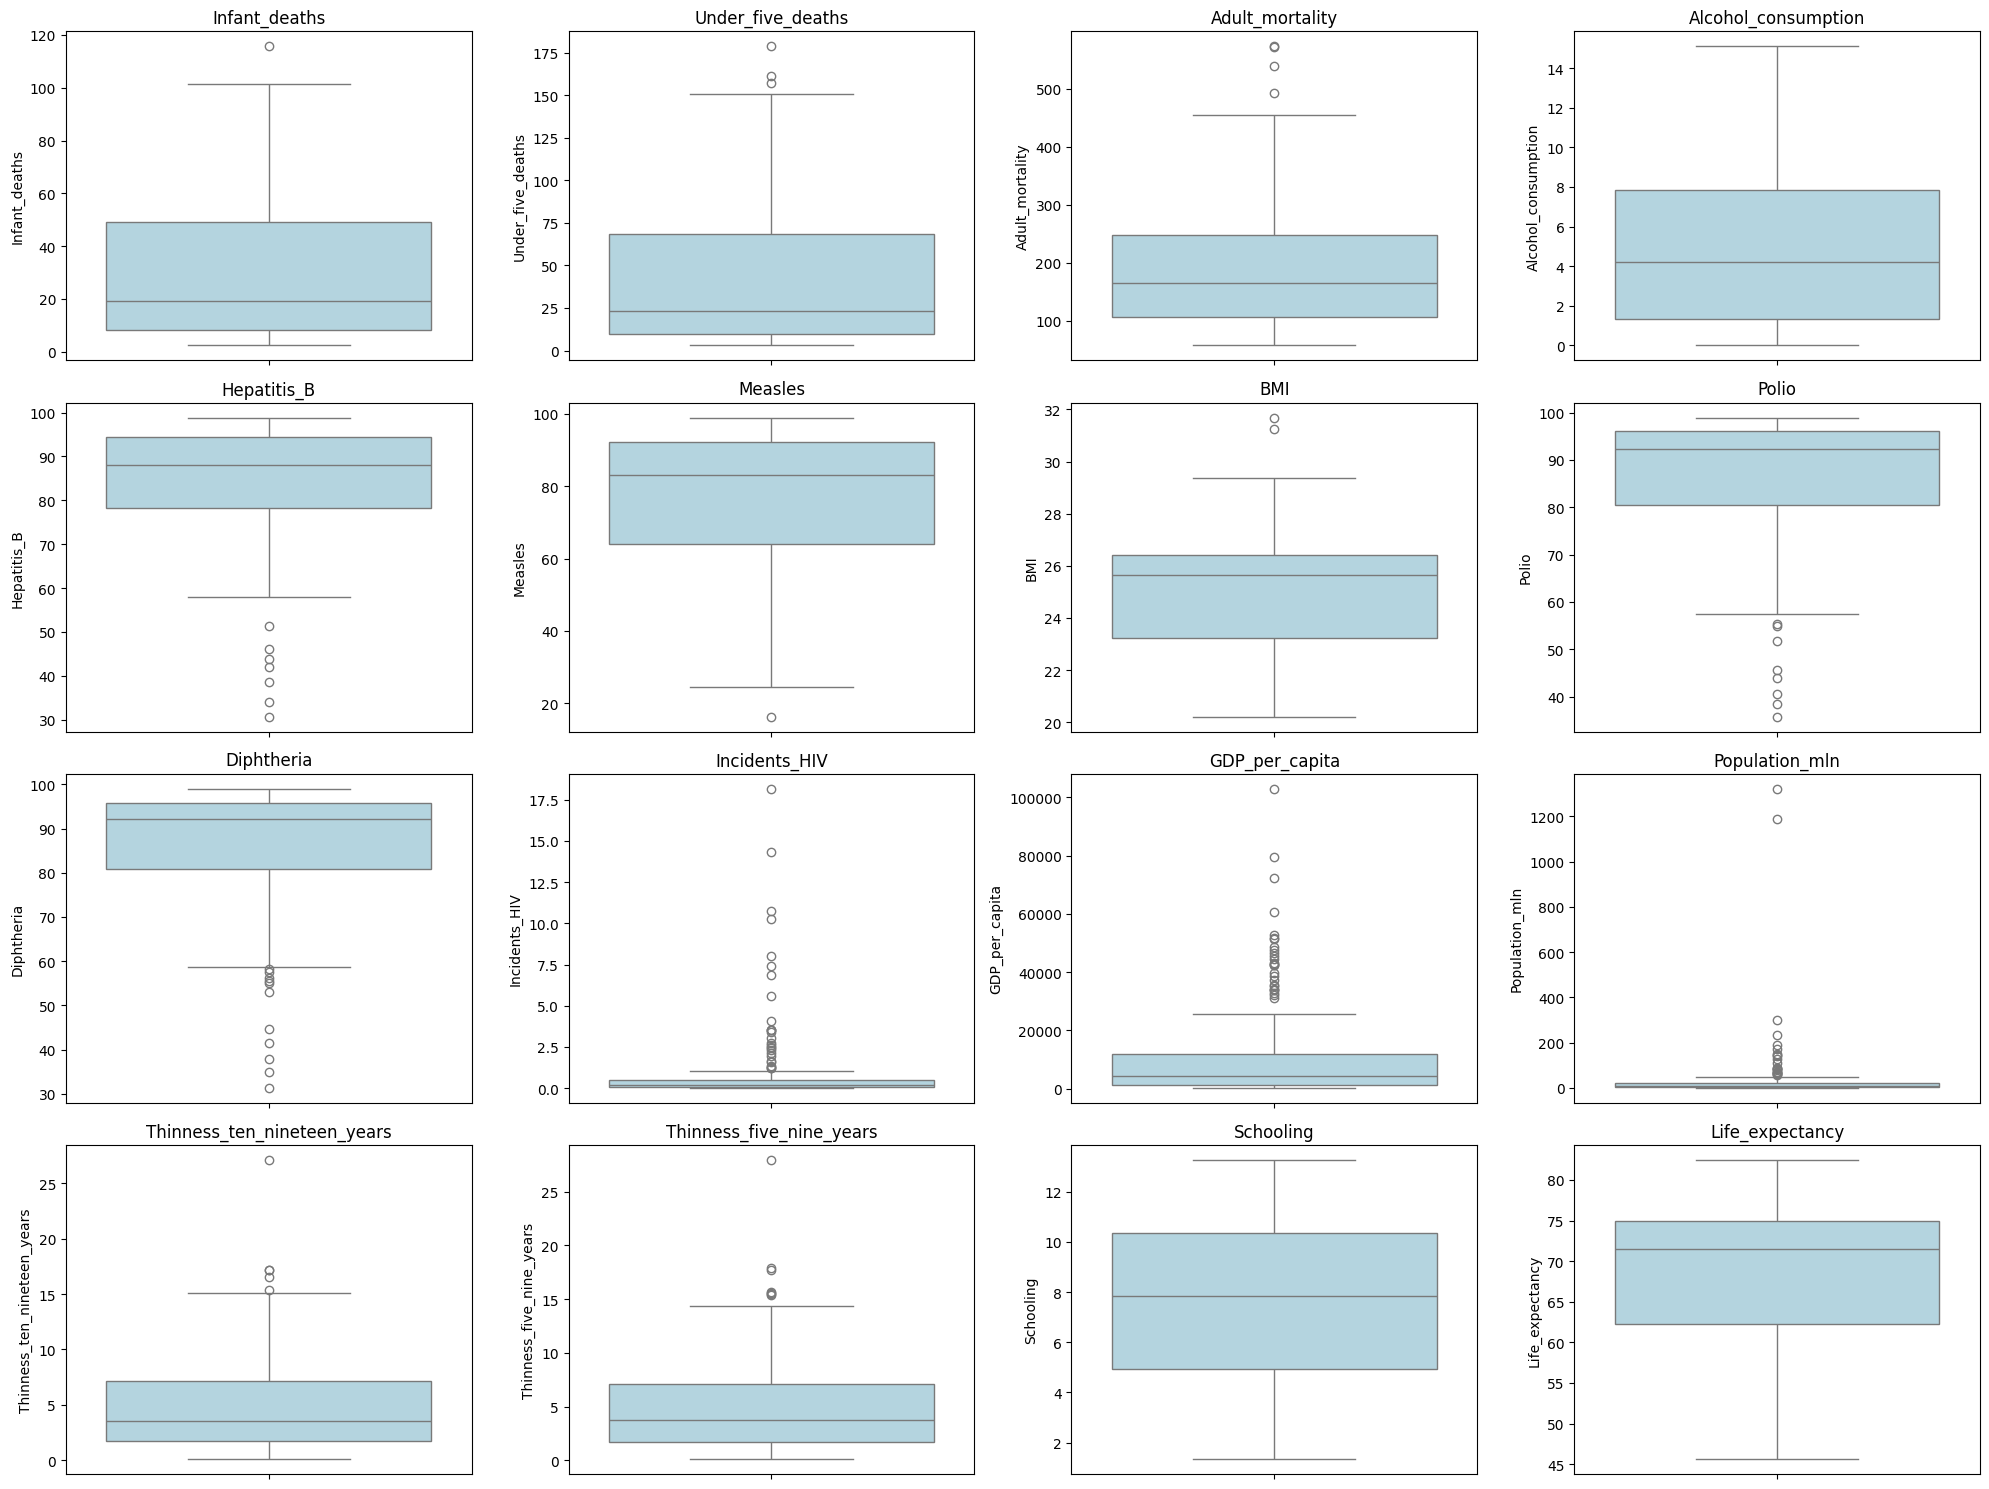

In [17]:
columns = [
    'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 
    'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 
    'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 
    'Population_mln', 'Thinness_ten_nineteen_years', 
    'Thinness_five_nine_years', 'Schooling', 'Life_expectancy'
]

# 박스플롯 그리기
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)  
    sns.boxplot(data=df, y=column, color="lightblue")
    plt.title(column)
    plt.tight_layout()

plt.show()

* 수치형 변수의 경우 `Alcohol_consumption`, `Schooling`, `Life_expectancy` 컬럼을 제외하고 모두 사분위수 기준으로 판단했을 때 이상값이 존재한다.
* 하지만 아직 변수별 특성을 모르기 때문에 사분위수만으로 이상치를 판단하여 제거하기에는 무리가 있을 것 이라 판단하였다. 
* 따라서 컬럼별로 분석해보며 이상값에 대해 자세히 들여다 보려고 한다.

In [18]:
columns = ['Country', 'Region', 'Year']


def display_value_counts(columns, dtype):
    for column in columns:
        print(f"Value counts for {column} ({dtype}):\n")
        print(df[column].value_counts())  
        print("-" * 50)

print("=== Object형 Columns ===")
display_value_counts(columns, "Object")

=== Object형 Columns ===
Value counts for Country (Object):

Country
Afghanistan            1
Albania                1
Algeria                1
Angola                 1
Antigua and Barbuda    1
                      ..
Venezuela, RB          1
Vietnam                1
Yemen, Rep.            1
Zambia                 1
Zimbabwe               1
Name: count, Length: 179, dtype: int64
--------------------------------------------------
Value counts for Region (Object):

Region
Africa                           51
Asia                             27
European Union                   27
Central America and Caribbean    19
Rest of Europe                   15
Middle East                      14
South America                    12
Oceania                          11
North America                     3
Name: count, dtype: int64
--------------------------------------------------
Value counts for Year (Object):

Year
2007.5    179
Name: count, dtype: int64
----------------------------------------------

In [19]:
df['Country'].value_counts().unique()

array([1])

* `country`컬럼의 경우 모든 나라가 1개만 들어가 있어야 하는데, 확인 결과 1개씩만 들어가 있어서 이상값이 없다고 판단하였다.
* `Region`은 각 대륙별 나라 갯수를 나타내고 있는데 2007년도 기준 대륙별 국가 수와 일치하기에 이상치가 없다고 판단하였다.
* `year` 컬럼의 경우 2007.5로 고정되어있기 때문에 eda에서 연도에 따른 유의미한 인사이트를 도출할 수는 없다고 판단해서 eda시 제외하였다.

In [20]:
print(df[['Diphtheria', 'Incidents_HIV', 'Hepatitis_B', 'Measles']].describe())

       Diphtheria  Incidents_HIV  Hepatitis_B     Measles
count  179.000000     179.000000   179.000000  179.000000
mean    86.271648       0.894288    84.292598   77.344972
std     13.931532       2.311895    13.820223   17.315208
min     31.312500       0.010000    30.687500   16.250000
25%     80.812500       0.080000    78.218750   64.000000
50%     92.062500       0.164375    88.000000   83.000000
75%     95.781250       0.516250    94.375000   92.250000
max     99.000000      18.164375    98.875000   99.000000


In [21]:
# 이상치 탐지를 위한 IQR 방법 (Life_expectancy 기준)

core_colums = ['Diphtheria', 'Incidents_HIV', 'Hepatitis_B', 'Measles', 'Life_expectancy']
# - Diphtheria: 디프테리아 예방접종률
# - Incidents_HIV: HIV 발생 건수
# - Hepatitis_B: B형 간염 예방접종률
# - Measles: 홍역 사례 수

for col in core_colums:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 범위 외의 데이터 확인
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'{col}: {outliers}')

Diphtheria:                       Country                         Region    Year  \
0                 Afghanistan                           Asia  2007.5   
3                      Angola                         Africa  2007.5   
31   Central African Republic                         Africa  2007.5   
32                       Chad                         Africa  2007.5   
51          Equatorial Guinea                         Africa  2007.5   
55                   Ethiopia                         Africa  2007.5   
67                     Guinea                         Africa  2007.5   
70                      Haiti  Central America and Caribbean  2007.5   
118                     Niger                         Africa  2007.5   
119                   Nigeria                         Africa  2007.5   
146                   Somalia                         Africa  2007.5   

     Infant_deaths  Under_five_deaths  Adult_mortality  Alcohol_consumption  \
0         71.08125           98.61250       

###
* 이상치 밖의 값은 없는 것을 확인함

5. 데이터 시각화를 통한 탐색

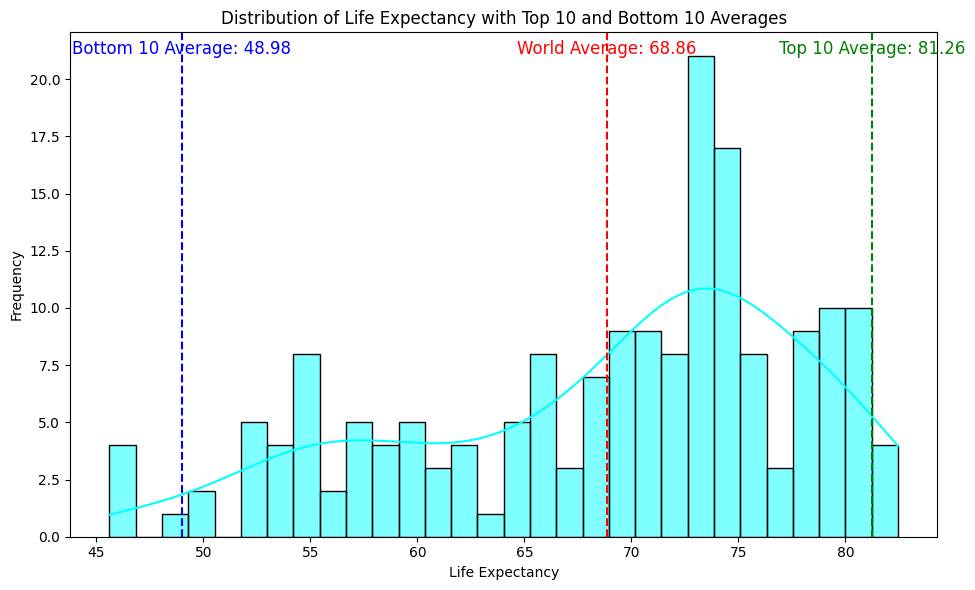

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17496\3936185702.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_bottom, x='Group', y='Diphtheria', ax=axes[0], palette='viridis')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17496\3936185702.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_bottom, x='Group', y='Hepatitis_B', ax=axes[1], palette='viridis')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_17496\3936185702.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_bottom, x='Group', y='Measles', ax=a

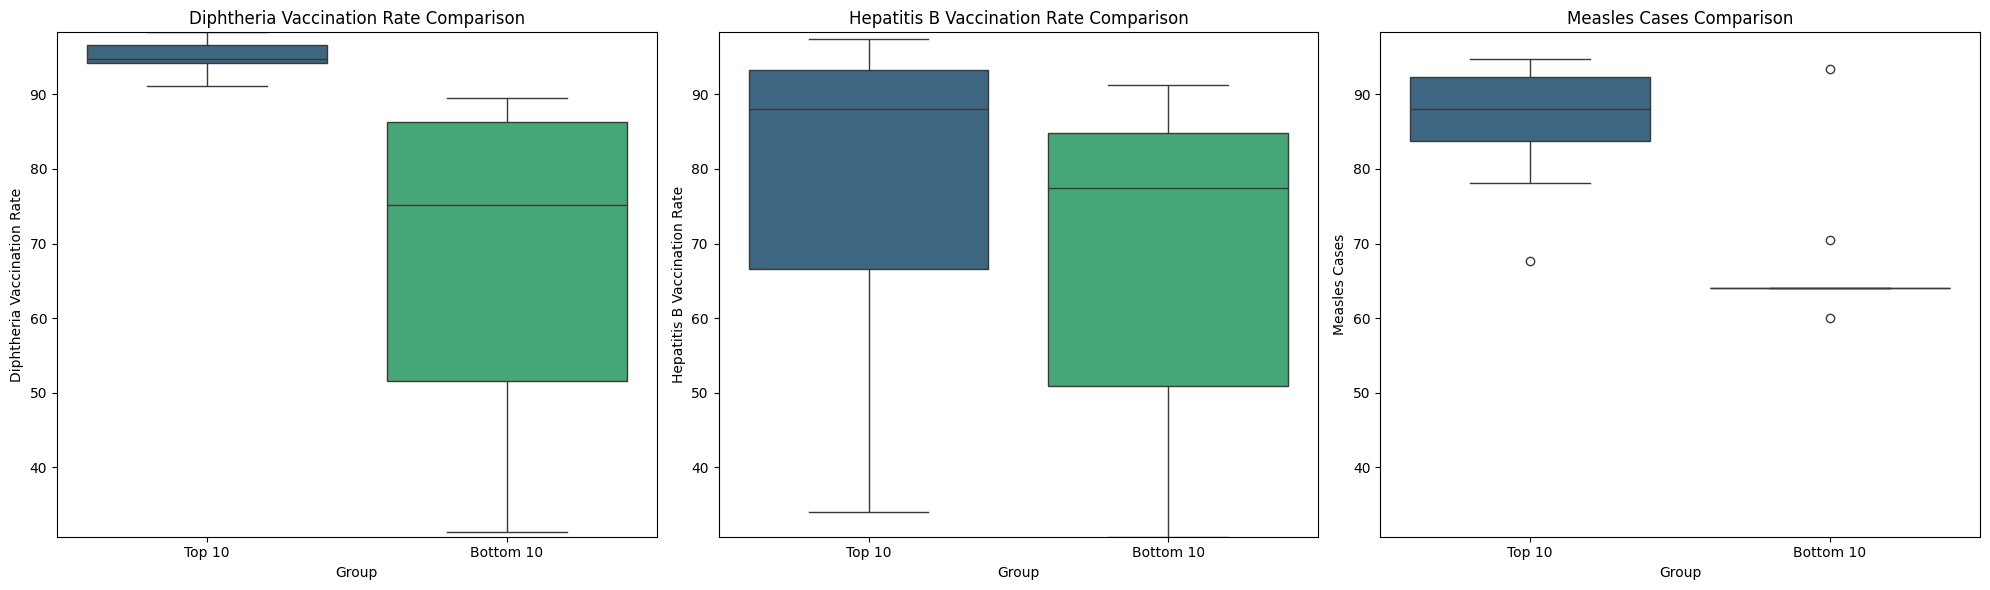

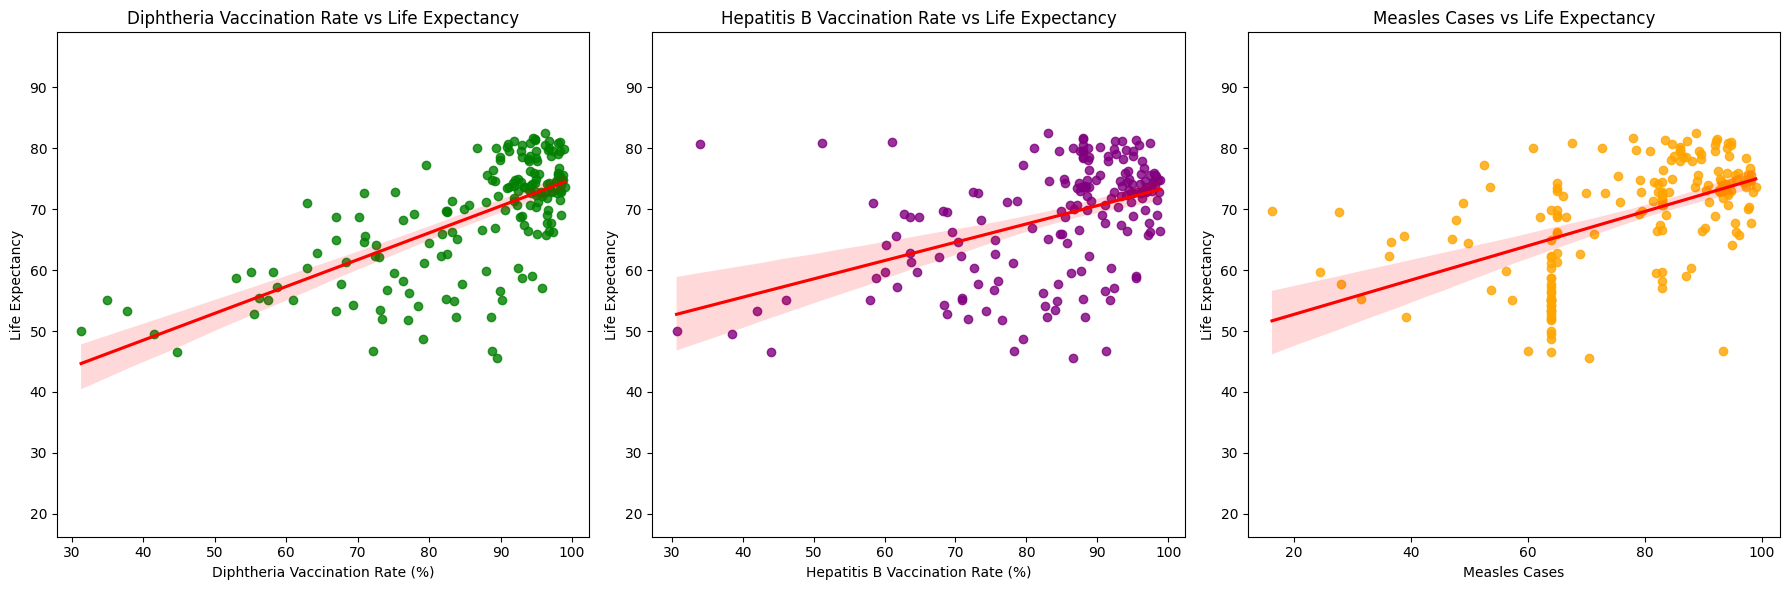

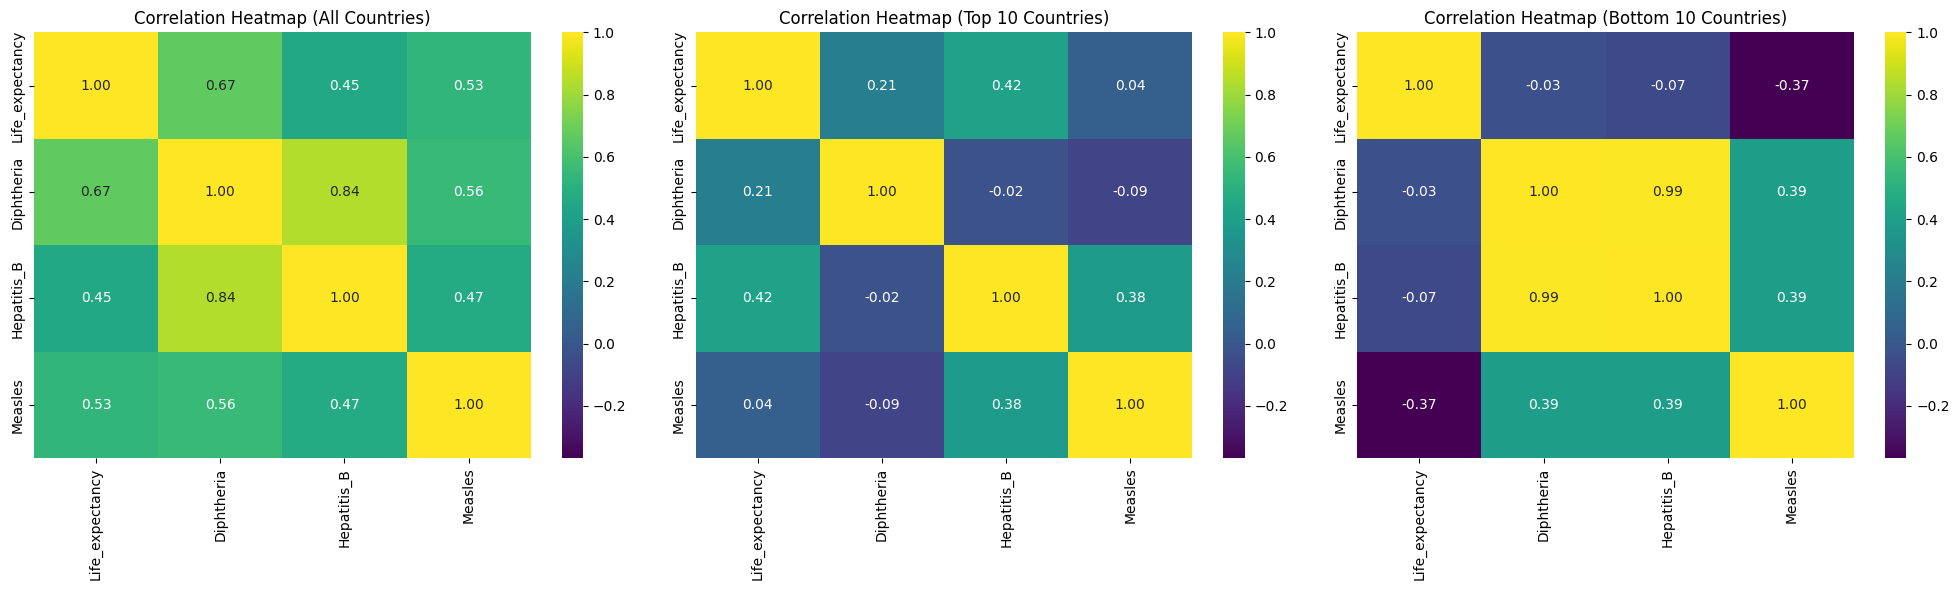

In [22]:
# 데이터 준비 
top_10 = df.nlargest(10, 'Life_expectancy')
bottom_10 = df.nsmallest(10, 'Life_expectancy')

# 1. 국가별 기대수명 분포 (상위 10개, 하위 10개 그룹 평균 표시)
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
sns.histplot(df['Life_expectancy'], kde=True, color='cyan', bins=30)
mean_life_expectancy = df['Life_expectancy'].mean()
mean_top_10 = df.nlargest(10, 'Life_expectancy')['Life_expectancy'].mean()
mean_bottom_10 = df.nsmallest(10, 'Life_expectancy')['Life_expectancy'].mean()

# 평균 수치 라인
line_width = 1.5  # 선 두께 설정
plt.axvline(mean_life_expectancy, color='red', linestyle='--', linewidth=line_width)
plt.axvline(mean_top_10, color='green', linestyle='--', linewidth=line_width)
plt.axvline(mean_bottom_10, color='blue', linestyle='--', linewidth=line_width)

# 그래프의 최대 빈도 값 (높이 설정)
max_y = plt.gca().get_ylim()[1]  # y축 최대값 (빈도수의 최대값)

# 평균 수치 텍스트 추가 (기울기 제거 및 수평 정렬)
plt.text(mean_life_expectancy, max_y * 0.95, f'World Average: {mean_life_expectancy:.2f}', color='red', fontsize=12, ha='center', va='bottom')
plt.text(mean_top_10, max_y * 0.95, f'Top 10 Average: {mean_top_10:.2f}', color='green', fontsize=12, ha='center', va='bottom')
plt.text(mean_bottom_10, max_y * 0.95, f'Bottom 10 Average: {mean_bottom_10:.2f}', color='blue', fontsize=12, ha='center', va='bottom')

# 그래프 제목 및 라벨
plt.title("Distribution of Life Expectancy with Top 10 and Bottom 10 Averages")
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

# 그래프 간격 조정
plt.subplots_adjust(right=0.80)  # 오른쪽 여백을 충분히 주어 레이아웃이 벗어나지 않도록 설정
plt.tight_layout()  # 여백을 자동으로 조정
plt.show()

# 2. 상위/하위 기대수명 그룹 비교 및 건강 요소 분석 (상위 10개 vs 하위 10개 그룹)
top_10 = df.nlargest(10, 'Life_expectancy')
bottom_10 = df.nsmallest(10, 'Life_expectancy')

# 상위 10개 vs 하위 10개 국가를 하나의 데이터프레임으로 결합
top_bottom = pd.concat([top_10, bottom_10])
top_bottom['Group'] = ['Top 10'] * len(top_10) + ['Bottom 10'] * len(bottom_10)

# 건강 요소별 비교 (디프테리아, B형 간염 예방접종률, 홍역 사례)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 높이를 줄임

# Y축 범위 설정을 위해 각각의 y축 최소/최대 값 계산
y_min = min(top_bottom['Diphtheria'].min(), top_bottom['Hepatitis_B'].min(), top_bottom['Measles'].min())
y_max = max(top_bottom['Diphtheria'].max(), top_bottom['Hepatitis_B'].max(), top_bottom['Measles'].max())

sns.boxplot(data=top_bottom, x='Group', y='Diphtheria', ax=axes[0], palette='viridis')
axes[0].set_title('Diphtheria Vaccination Rate Comparison')
axes[0].set_ylabel('Diphtheria Vaccination Rate')
axes[0].set_ylim([y_min, y_max])  # Y축 범위 통일

sns.boxplot(data=top_bottom, x='Group', y='Hepatitis_B', ax=axes[1], palette='viridis')
axes[1].set_title('Hepatitis B Vaccination Rate Comparison')
axes[1].set_ylabel('Hepatitis B Vaccination Rate')
axes[1].set_ylim([y_min, y_max])  # Y축 범위 통일

sns.boxplot(data=top_bottom, x='Group', y='Measles', ax=axes[2], palette='viridis')
axes[2].set_title('Measles Cases Comparison')
axes[2].set_ylabel('Measles Cases')
axes[2].set_ylim([y_min, y_max])  # Y축 범위 통일

# 그래프 간격 조정
plt.subplots_adjust(wspace=0.3)  # 그래프 간의 간격을 충분히 두기
plt.tight_layout()  # 여백을 자동으로 조정
plt.show()

# 3. B형 간염, 디프테리아, 홍역과 기대수명 간의 관계 (산점도 + 회귀선)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 높이를 줄임

# Y축 범위 설정을 위해 각각의 y축 최소/최대 값 계산
y_min = min(df['Diphtheria'].min(), df['Hepatitis_B'].min(), df['Measles'].min())
y_max = max(df['Diphtheria'].max(), df['Hepatitis_B'].max(), df['Measles'].max())

# 3.1 디프테리아 예방접종률과 기대수명 간의 관계
sns.regplot(data=df, x='Diphtheria', y='Life_expectancy', scatter_kws={'color': 'green'}, line_kws={'color': 'red'}, ax=axes[0])
axes[0].set_title("Diphtheria Vaccination Rate vs Life Expectancy")
axes[0].set_xlabel('Diphtheria Vaccination Rate (%)')
axes[0].set_ylabel('Life Expectancy')
axes[0].set_ylim([y_min, y_max])  # Y축 범위 통일

# 3.2 B형 간염 예방접종률과 기대수명 간의 관계
sns.regplot(data=df, x='Hepatitis_B', y='Life_expectancy', scatter_kws={'color': 'purple'}, line_kws={'color': 'red'}, ax=axes[1])
axes[1].set_title("Hepatitis B Vaccination Rate vs Life Expectancy")
axes[1].set_xlabel('Hepatitis B Vaccination Rate (%)')
axes[1].set_ylabel('Life Expectancy')
axes[1].set_ylim([y_min, y_max])  # Y축 범위 통일

# 3.3 홍역 사례 수와 기대수명 간의 관계
sns.regplot(data=df, x='Measles', y='Life_expectancy', scatter_kws={'color': 'orange'}, line_kws={'color': 'red'}, ax=axes[2])
axes[2].set_title("Measles Cases vs Life Expectancy")
axes[2].set_xlabel('Measles Cases')
axes[2].set_ylabel('Life Expectancy')
axes[2].set_ylim([y_min, y_max])  # Y축 범위 통일

# 그래프 간격 조정
plt.subplots_adjust(wspace=0.3)  # 그래프 간의 간격을 충분히 두기
plt.tight_layout()  # 여백을 자동으로 조정
plt.show()

# 4. 전체 국가, 상위 10개, 하위 10개 그룹에 대한 heatmap
# 전체 데이터와 상위/하위 10개 그룹의 데이터를 결합하여 상관 행렬을 계산
df_all = df[['Life_expectancy', 'Diphtheria', 'Hepatitis_B', 'Measles']].corr()
top_10_corr = top_10[['Life_expectancy', 'Diphtheria', 'Hepatitis_B', 'Measles']].corr()
bottom_10_corr = bottom_10[['Life_expectancy', 'Diphtheria', 'Hepatitis_B', 'Measles']].corr()

# 히트맵의 전체 값 범위 계산
vmin = min(df_all.min().min(), top_10_corr.min().min(), bottom_10_corr.min().min())
vmax = max(df_all.max().max(), top_10_corr.max().max(), bottom_10_corr.max().max())

# Heatmap 그리기
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 높이를 줄임

sns.heatmap(df_all, annot=True, cmap='viridis', fmt='.2f', ax=axes[0], vmin=vmin, vmax=vmax)
axes[0].set_title("Correlation Heatmap (All Countries)")

sns.heatmap(top_10_corr, annot=True, cmap='viridis', fmt='.2f', ax=axes[1], vmin=vmin, vmax=vmax)
axes[1].set_title("Correlation Heatmap (Top 10 Countries)")

sns.heatmap(bottom_10_corr, annot=True, cmap='viridis', fmt='.2f', ax=axes[2], vmin=vmin, vmax=vmax)
axes[2].set_title("Correlation Heatmap (Bottom 10 Countries)")

# 그래프 간격 조정
plt.subplots_adjust(wspace=0.3)  # 그래프 간의 간격을 충분히 두기
plt.tight_layout()  # 여백을 자동으로 조정
plt.show()


1. 전체 국가 상관 행렬 분석

- 기대수명과 디프테리아 예방접종률 간에는 **강한 양의 상관관계 (0.67)**가 있다. 디프테리아 예방접종률이 높을수록 기대수명이 높아지는 경향이 보인다. 이는 예방접종 프로그램의 효과가 기대수명에 긍정적인 영향을 미친다는 점을 시사한다.
- 기대수명과 B형 간염 예방접종률 간의 상관관계는 **중간 정도 (0.45)**로 나타났다. B형 간염 예방접종률이 높을수록 기대수명이 증가하는 경향을 보인다. 하지만 다른 변수들이 더 중요한 영향을 미치는 것으로 보인다.
- 기대수명과 홍역 사례 수 간에는 **중간 정도의 양의 상관관계 (0.53)**가 있다. 홍역과 같은 전염병의 발생이 기대수명에 영향을 미친다. 예방접종률이 낮은 국가일수록 기대수명이 낮아지는 경향이 있다.
- 디프테리아 예방접종률과 B형 간염 예방접종률 간에는 **강한 양의 상관관계 (0.84)**가 있다. 두 예방접종이 함께 이루어지는 경우가 많다는 점을 나타낸다.
- 디프테리아 예방접종률과 홍역 사례 수 간에는 **중간 정도 (0.56)**의 양의 상관관계가 있다. 예방접종률이 높을수록 전염병의 발생이 줄어들고, 이는 기대수명 증가로 이어진다.

2. 상위 10개 국가 상관 행렬 분석

- 기대수명과 디프테리아 예방접종률 간에는 **약한 양의 상관관계 (0.21)**가 나타났다. 상위 10개 국가에서는 기대수명이 이미 높은 수준에 있기 때문에, 디프테리아 예방접종률이 큰 영향을 미치지 않는다.
- 기대수명과 B형 간염 예방접종률 간에는 **약한 양의 상관관계 (0.42)**가 있다. B형 간염 예방접종률이 높을수록 기대수명이 다소 높아지는 경향이 있다.
- 기대수명과 홍역 사례 수 간에는 **상관이 없음 (0.04)**으로, 상위 국가에서는 홍역 발생이 적어 기대수명에 큰 영향을 미치지 않는다.

3. 하위 10개 국가 상관 행렬 분석

- 기대수명과 디프테리아 예방접종률 간에는 **약한 음의 상관관계 (-0.03)**가 있다. 하위 국가에서는 디프테리아 예방접종률이 낮을수록 기대수명이 짧은 경향이 있다. 이는 의료 시스템이나 예방접종의 부족이 영향을 미친다는 점을 시사한다.
- 기대수명과 B형 간염 예방접종률 간에는 **약한 음의 상관관계 (-0.07)**가 있다. B형 간염 예방접종률이 낮을수록 기대수명이 짧아지는 경향이 있다. 예방접종이 부족한 국가에서 기대수명이 낮을 수 있다는 점을 나타낸다.
- 기대수명과 홍역 사례 수 간에는 **강한 음의 상관관계 (-0.37)**가 나타났다. 홍역 사례가 많은 국가일수록 기대수명이 낮다. 하위 국가에서는 예방접종 시스템이 미비해 전염병의 확산이 기대수명에 부정적인 영향을 미친다.

4. 결론

- 기대수명과 디프테리아 예방접종률 간에는 전 세계적으로 강한 양의 상관관계가 있으며, 디프테리아 예방접종률이 높을수록 기대수명이 증가하는 경향이 있다.
- 홍역 발생은 하위 국가에서 기대수명에 큰 영향을 미친다. 전염병이 많이 발생하는 국가일수록 기대수명이 낮아지는 경향을 보인다. 예방접종이 제대로 이루어지지 않은 국가에서는 기대수명이 낮다.
- 상위 10개 국가에서는 기대수명과 예방접종률 간의 상관이 약화되며, 다른 요인들이 기대수명에 더 큰 영향을 미친다. 이미 높은 기대수명을 가진 국가에서는 다른 사회적, 경제적 요인이 더 중요한 영향을 미친다.
- 하위 10개 국가에서는 예방접종률이 기대수명에 더 큰 영향을 미친다. 예방접종이 강화되면 기대수명이 높아지는 경향이 나타난다.

### 기대수명과 디프테리아 예방접종률 간의 관계

- 전체 국가: 강한 양의 상관관계 (0.67). 디프테리아 예방접종률이 높을수록 기대수명이 증가하는 경향이 있다.
- 상위 10개 국가: 약한 양의 상관관계 (0.21). 상위 10개 국가에서는 기대수명이 이미 높기 때문에 디프테리아 예방접종률이 큰 영향을 미치지 않는다.
- 하위 10개 국가: 약한 음의 상관관계 (-0.03). 하위 국가에서는 디프테리아 예방접종률이 낮을수록 기대수명이 짧은 경향이 있다.

### 기대수명과 B형 간염 예방접종률 간의 관계

- 전체 국가: 중간 정도의 상관관계 (0.45). B형 간염 예방접종률이 높을수록 기대수명이 증가하는 경향이 있다.
- 상위 10개 국가: 약한 양의 상관관계 (0.42). B형 간염 예방접종률이 높을수록 기대수명이 다소 높아지는 경향이 있다.
- 하위 10개 국가: 약한 음의 상관관계 (-0.07). B형 간염 예방접종률이 낮을수록 기대수명이 짧은 경향이 있다.
### 기대수명과 홍역 사례 수 간의 관계

- 전체 국가: 중간 정도의 양의 상관관계 (0.53). 홍역 사례가 많을수록 기대수명이 낮아지는 경향이 있다.
- 상위 10개 국가: 상관이 없음 (0.04). 상위 국가에서는 홍역 발생이 적어 기대수명에 큰 영향을 미치지 않는다.
- 하위 10개 국가: 강한 음의 상관관계 (-0.37). 홍역 사례가 많은 국가일수록 기대수명이 낮아지는 경향이 있다.

### 결론

- 디프테리아 예방접종률: 전체 국가에서 강한 양의 상관관계를 보이며, 예방접종률이 높을수록 기대수명이 증가한다. 상위 10개 국가에서는 영향이 미미하고, 하위 10개 국가에서는 낮은 예방접종률이 기대수명 감소와 연관이 있다.
- B형 간염 예방접종률: 전체적으로 중간 정도의 양의 상관관계를 보이며, 예방접종률이 높을수록 기대수명이 증가하는 경향이 있다. 상위 국가에서는 약한 상관관계를 보이고, 하위 국가에서는 낮은 예방접종률이 기대수명 감소와 연결된다.
- 홍역 사례 수: 전체적으로 중간 정도의 양의 상관관계를 보이며, 홍역 사례가 많을수록 기대수명이 낮아진다. 상위 국가에서는 상관이 없지만, 하위 국가에서는 강한 음의 상관관계를 보인다.

### RandomForestRegressor

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Feature와 Target 정의
X = df[['Diphtheria', 'Hepatitis_B', 'Measles']]  # 특징 변수
y = df['Life_expectancy']  # 타겟 변수

# 2. 학습용/테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 스케일링 (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 모델 정의 (랜덤포레스트 회귀 모델)
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# 5. 예측 및 평가
y_pred = model.predict(X_test_scaled)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

Mean Absolute Error: 3.90
Mean Squared Error: 23.15


### 모델 개선

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import numpy as np

# 1. Feature와 Target 정의
X = df[['Diphtheria', 'Hepatitis_B', 'Measles']]  # 기존 특징 변수
y = df['Life_expectancy']  # 타겟 변수

# 2. 학습용/테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 스케일링 (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 1: 랜덤포레스트 회귀 모델 (하이퍼파라미터 튜닝 적용)
# GridSearchCV를 활용하여 최적의 파라미터를 찾습니다.
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters for RandomForest:", grid_search_rf.best_params_)

# 최적의 모델로 예측
rf_best_model = grid_search_rf.best_estimator_
y_pred_rf = rf_best_model.predict(X_test_scaled)

# 랜덤포레스트 모델 성능 평가
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'RandomForest MAE: {mae_rf:.2f}')
print(f'RandomForest MSE: {mse_rf:.2f}')

# 모델 2: XGBoost 회귀 모델
xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.05, max_depth=5)
xgb_model.fit(X_train_scaled, y_train)

# XGBoost 모델 예측
y_pred_xgb = xgb_model.predict(X_test_scaled)

# XGBoost 모델 성능 평가
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f'XGBoost MAE: {mae_xgb:.2f}')
print(f'XGBoost MSE: {mse_xgb:.2f}')

# 모델 비교
if mae_rf < mae_xgb:
    print(f'RandomForest가 XGBoost보다 더 좋은 성능을 보였습니다.')
else:
    print(f'XGBoost가 RandomForest보다 더 좋은 성능을 보였습니다.')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for RandomForest: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
RandomForest MAE: 3.82
RandomForest MSE: 21.00
XGBoost MAE: 3.71
XGBoost MSE: 23.44
XGBoost가 RandomForest보다 더 좋은 성능을 보였습니다.


### 개선 사항에 대해 설명:
1. 하이퍼파라미터 튜닝 (GridSearchCV):
* RandomForestRegressor에 대해 GridSearchCV를 사용하여 최적의 하이퍼파라미터 조합을 탐색. (n_estimators, max_depth, min_samples_split)

2. XGBoost 모델 추가:
* XGBoost 모델을 추가하여, 성능을 비교.

3. 모델 성능 비교:
* 최종적으로 두 모델(RF와 XGBoost)을 비교하여 성능이 더 좋은 모델을 선택. MAE(Mean Absolute Error)와 MSE(Mean Squared Error)를 기반으로 평가.

### 모델 앙상블(Voting Regressor)

In [25]:
import xgboost
import sklearn
print("XGBoost 버전:", xgboost.__version__)
print("scikit-learn 버전:", sklearn.__version__)


XGBoost 버전: 2.1.1
scikit-learn 버전: 1.5.2


In [26]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f'XGBoost MAE: {mae_xgb:.2f}')
print(f'XGBoost MSE: {mse_xgb:.2f}')

XGBoost MAE: 4.04
XGBoost MSE: 29.08


In [27]:
xgb_model = xgb.XGBRegressor(
    n_estimators=200, 
    max_depth=5, 
    learning_rate=0.1, 
    subsample=0.8, 
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f'XGBoost MAE: {mae_xgb:.2f}')
print(f'XGBoost MSE: {mse_xgb:.2f}')


XGBoost MAE: 4.08
XGBoost MSE: 28.46


In [29]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Feature와 Target 정의
X = df[['Diphtheria', 'Hepatitis_B', 'Measles']]  # 기존 특징 변수
y = df['Life_expectancy']  # 타겟 변수

# 2. 학습용/테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 스케일링 (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 개별 모델 정의
# XGBoost 모델
xgb_model = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)

# RandomForest 모델
rf_model = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=10, random_state=42)

# 5. 앙상블 모델 정의 (Voting Regressor)
voting_model = VotingRegressor(estimators=[('xgb', xgb_model), ('rf', rf_model)])

# 6. 앙상블 모델 학습
voting_model.fit(X_train_scaled, y_train)

# 7. 앙상블 모델 예측
y_pred_voting = voting_model.predict(X_test_scaled)

# 8. 앙상블 모델 성능 평가
mae_voting = mean_absolute_error(y_test, y_pred_voting)
mse_voting = mean_squared_error(y_test, y_pred_voting)

print(f'Voting Regressor MAE: {mae_voting:.2f}')
print(f'Voting Regressor MSE: {mse_voting:.2f}')


Voting Regressor MAE: 3.69
Voting Regressor MSE: 22.03
